In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-credit-default-loan-default/target.csv
/kaggle/input/bank-credit-default-loan-default/data/train_data/train_data_0.pq
/kaggle/input/bank-credit-default-loan-default/data/train_data/train_data_9.pq
/kaggle/input/bank-credit-default-loan-default/data/train_data/train_data_5.pq
/kaggle/input/bank-credit-default-loan-default/data/train_data/train_data_4.pq
/kaggle/input/bank-credit-default-loan-default/data/train_data/train_data_2.pq
/kaggle/input/bank-credit-default-loan-default/data/train_data/train_data_10.pq
/kaggle/input/bank-credit-default-loan-default/data/train_data/train_data_3.pq
/kaggle/input/bank-credit-default-loan-default/data/train_data/train_data_8.pq
/kaggle/input/bank-credit-default-loan-default/data/train_data/train_data_6.pq
/kaggle/input/bank-credit-default-loan-default/data/train_data/train_data_11.pq
/kaggle/input/bank-credit-default-loan-default/data/train_data/train_data_1.pq
/kaggle/input/bank-credit-default-loan-default/data/train_data/train_da

In [43]:
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os



# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

In [44]:
data = pd.read_parquet('/kaggle/input/bank-credit-default-loan-default/data/train_data/train_data_0.pq')

In [45]:
data.head()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,0,1,18,9,2,3,16,10,11,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0
1,0,2,18,9,14,14,12,12,0,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,3,4,1,0,0
2,0,3,18,9,4,8,1,11,11,0,5,0,2,8,6,16,5,4,8,1,1,1,1,1,15,2,17,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,2,3,1,1,1
3,0,4,4,1,9,12,16,7,12,2,3,0,2,4,6,16,5,4,8,0,1,1,1,1,16,2,17,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,1,1,0,0
4,0,5,5,12,15,2,11,12,10,2,3,0,2,4,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0


In [46]:
data.shape

(1974724, 61)

In [47]:
data.columns

Index(['id', 'rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_total_overdue',
       'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5',
       'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90',
       'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060',
       'is_zero_loans6090', 'is_zero_loans90', 'pre_util', 'pre_over2limit',
       'pre_maxover2limit', 'is_zero_util', 'is_zero_over2limit',
       'is_zero_maxover2limit', 'enc_paym_0', 'enc_paym_1', 'enc_paym_2',
       'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7',
       'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12',
       'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16',
       'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20',
       'enc_paym_21', 

In [48]:
data.dtypes

id                               int64
rn                               int64
pre_since_opened                 int64
pre_since_confirmed              int64
pre_pterm                        int64
pre_fterm                        int64
pre_till_pclose                  int64
pre_till_fclose                  int64
pre_loans_credit_limit           int64
pre_loans_next_pay_summ          int64
pre_loans_outstanding            int64
pre_loans_total_overdue          int64
pre_loans_max_overdue_sum        int64
pre_loans_credit_cost_rate       int64
pre_loans5                       int64
pre_loans530                     int64
pre_loans3060                    int64
pre_loans6090                    int64
pre_loans90                      int64
is_zero_loans5                   int64
is_zero_loans530                 int64
is_zero_loans3060                int64
is_zero_loans6090                int64
is_zero_loans90                  int64
pre_util                         int64
pre_over2limit           

In [49]:
pd.value_counts(data['pre_loans_credit_limit'])

14    134518
19    116963
10    112585
12    112024
3     109933
1     109169
11    106627
17    105715
16    105116
7     105097
8     103617
13    100302
5      96205
0      95755
15     95730
6      88776
2      85575
18     79187
4      70431
9      41399
Name: pre_loans_credit_limit, dtype: int64

In [50]:
data.describe()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
count,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000,1974724.0000000
mean,125946.4734312,6.5374711,9.2713250,8.3302644,8.2990707,8.3094438,6.9917806,8.3370106,9.7408883,2.3998478,3.0129512,0.0000000,2.0121146,4.5954224,5.9790918,15.8703753,5.0008254,3.9999413,8.0010857,0.9049189,0.8316909,0.9587416,0.9786112,0.9793075,13.9347129,2.1739149,15.5877328,0.7113070,0.9433263,0.8361092,0.1857206,0.3843271,0.5195359,0.6493839,0.7956054,0.9293010,1.1182930,1.2587952,1.3756576,1.4854359,1.6284899,2.7454075,1.8986395,1.9947355,2.0508339,2.0951713,2.1358149,2.1740223,2.2177747,2.2527194,3.2838589,2.3132417,2.3430135,2.3767175,3.5767241,1.0275618,2.6948976,3.3539355,1.0023856,0.1721385,0.2239336
std,72269.8082687,5.1211667,5.7737575,4.5935114,5.2455980,4.4648438,5.1841647,4.2339922,5.7996246,1.3763912,0.6838444,0.0000000,0.3348170,3.1219788,0.3459040,1.1966441,0.0556550,0.0132367,0.0812980,0.2933270,0.3741406,0.1988874,0.1446767,0.1423529,4.3354881,0.8238384,4.1514713,0.4531550,0.2312182,0.3701765,0.6533174,0.9325016,1.0807580,1.1881979,1.2833822,1.3511747,1.4194400,1.4522228,1.4694823,1.4767937,1.4736509,1.4609466,1.4285842,1.3994176,1.3790081,1.3611484,1.3433575,1.3252379,1.3027792,1.2835594,1.2655897,1.2476738,1.2284733,1.2055548,1.0355860,0.2767022,0.4891363,1.0573040,0.0590933,0.3775009,0.4168782
min,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,2.0000000,1.0000000,8.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
25%,63441.0000000,3.0000000,4.0000000,5.0000000,4.0000000,6.0000000,1.0000000,5.0000000,5.0000000,2.0000000,3.0000000,0.0000000,2.0000000,2.0000000,6.0000000,16.0000000,5.0000000,4.0000000,8.0000000,1.0000000,1.0000000,1.0000000,1.0000000,1.0000000,16.0000000,2.000

In [51]:
missing_values = data.isnull().sum()
missing_values

id                               0
rn                               0
pre_since_opened                 0
pre_since_confirmed              0
pre_pterm                        0
pre_fterm                        0
pre_till_pclose                  0
pre_till_fclose                  0
pre_loans_credit_limit           0
pre_loans_next_pay_summ          0
pre_loans_outstanding            0
pre_loans_total_overdue          0
pre_loans_max_overdue_sum        0
pre_loans_credit_cost_rate       0
pre_loans5                       0
pre_loans530                     0
pre_loans3060                    0
pre_loans6090                    0
pre_loans90                      0
is_zero_loans5                   0
is_zero_loans530                 0
is_zero_loans3060                0
is_zero_loans6090                0
is_zero_loans90                  0
pre_util                         0
pre_over2limit                   0
pre_maxover2limit                0
is_zero_util                     0
is_zero_over2limit  

In [52]:
data_2 = pd.read_csv('/kaggle/input/bank-credit-default-loan-default/target.csv')

In [53]:
data_2.head()

,id,flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [54]:
final_data = pd.merge(data, data_2 , on = 'id')

In [55]:
final_data.corr()

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag,flag
id,1.0000000,0.0162623,0.0067008,0.0441936,-0.0048999,-0.0024027,-0.0049134,0.0006842,-0.0007889,-0.0001221,0.0003108,NaN,-0.0028513,0.0043024,-0.0020054,0.0032496,0.0009195,0.0021631,-0.0002547,-0.0021421,0.0134109,0.0077641,0.0060899,0.0055103,-0.0033340,-0.0006628,0.0058916,-0.0027560,0.0005143,0.0107628,-0.0041524,-0.0009359,-0.0004194,0.0001742,0.0004879,0.0012788,0.0014705,0.0028987,0.0042118,0.0050089,0.0063188,0.0061816,0.0059202,0.0050467,0.0046254,0.0044674,0.0045337,0.0050937,0.0053288,0.0053809,0.0052871,0.0055540,0.0056787,0.0054550,0.0005168,0.0028266,-0.0005718,-0.0076368,-0.0006290,0.0052202,0.0083133,0.0028117
rn,0.0162623,1.0000000,-0.0277683,-0.0348786,-0.0238197,-0.0242051,0.0306450,0.1122185,0.0092237,0.0093400,-0.0036043,NaN,-0.0247084,0.0834081,0.0078738,0.0223775,-0.0039960,-0.0000796,-0.0058497,0.0320569,0.0576321,0.0803659,0.0643218,0.0747987,-0.1046202,-0.0264791,0.0616090,-0.1391241,0.0316472,0.0712221,-0.0004905,0.0746408,0.1187059,0.1335462,0.1381269,0.1420213,0.1302145,0.1300897,0.1287538,0.1284673,0.1195247,0.1159774,0.1059599,0.1053305,0.1065814,0.1079425,0.1095380,0.1108944,0.1116654,0.1128586,0.1139675,0.1149357,0.1154175,0.1151822,0.0925103,-0.0152766,-0.1429294,0.0873930,-0.0348057,0.0108187,0.0951622,0.0053781
pre_since_opened,0.0067008,-0.0277683,1.0000000,0.0150676,-0.0248424,0.0137127,-0.0279683,0.0146643,-0.0019823,0.0120313,-0.0018200,NaN,0.0069369,-0.0230915,0.0018752,-0.0040854,-0.0016126,0.0000363,0.0008655,0.0053854,0.0132640,-0.0138034,-0.0136262,-0.0211073,-0.0302740,0.0017021,0.0014167,-0.0353240,-0.0012630,0.0050380,0.0336231,0.0609794,0.0893419,0.1313121,0.1610242,0.1609285,0.1407620,0.1222428,0.1103981,0.1002678,0.0890243,0.0706640,0.0495716,0.0284615,0.0132913,0.0002963,-0.0108612,-0.0196821,-0.0230848,-0.0226576,-0.0203053,-0.0192536,-0.0212546,-0.0253189,-0.0229431,0.0012795,-0.0343773,-0.0124965,0.0120233,0.0201154,0.0193850,0.0066719
pre_since_confirmed,0.0441936,-0.0348786,0.0150676,1.0000000,-0.0016580,0.0205604,0.0434263,-0.1371160,-0.0054238,-0.0186050,0.0029831,NaN,-0.0039320,-0.0302201,0.0076525,-0.0012501,-0.0012228,0.0023262,-0.0013900,0.0134538,-0.0032571,0.0022216,0.0033287,0.0047382,0.0218668,0.0288535,-0.0162652,0.0325552,-0.0345556,-0.0062265,-0.0283566,-0.0322490,-0.0277567,-0.0244272,-0.0216648,-0.0190463,-0.0156644,-0.0144809,-0.0127353,-0.0099633,-0.0084519,-0.0082183,-0.0065620,-0.0064704,-0.0056549,-0.0051842,-0.0049503,-0.0043484,-0.0036516,-0.0024964,-0.0016697,-0.0009445,-0.0000482,0.0009726,0.0014586,-0.0101107,0.0705903,-0.0049602,0.0052238,-0.0016431,-0.0645856,-0.0062037
pre_pterm,-0.0048999,-0.0238197,-0.0248424,-0.0016580,1.0000000,0.0415110,0.2232416,-0.0551891,-0.0153191,-0.0181365,-0.0016535,NaN,0.0006872,-0.0188063,0.0070180,0.0320462,-0.0010034,0.0018356,-0.0012566,-0.0600504,0.0149021,-0.0153507,-0.0121023,-0.0096817,0.0706959,-0.0542041,0.0150542,0.0900473,0.0698157,0.0664095,-0.0615851,-0.0987895,-0.1232708,-0.1392950,-0.1397250,-0.1321658,-0.1288401,-0.1235458,-0.1077322,-0.0838099,-0.0431295,-0.0142912,0.0520498,0.0953051,0.1118672,0.1206625,0.127

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns


## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing

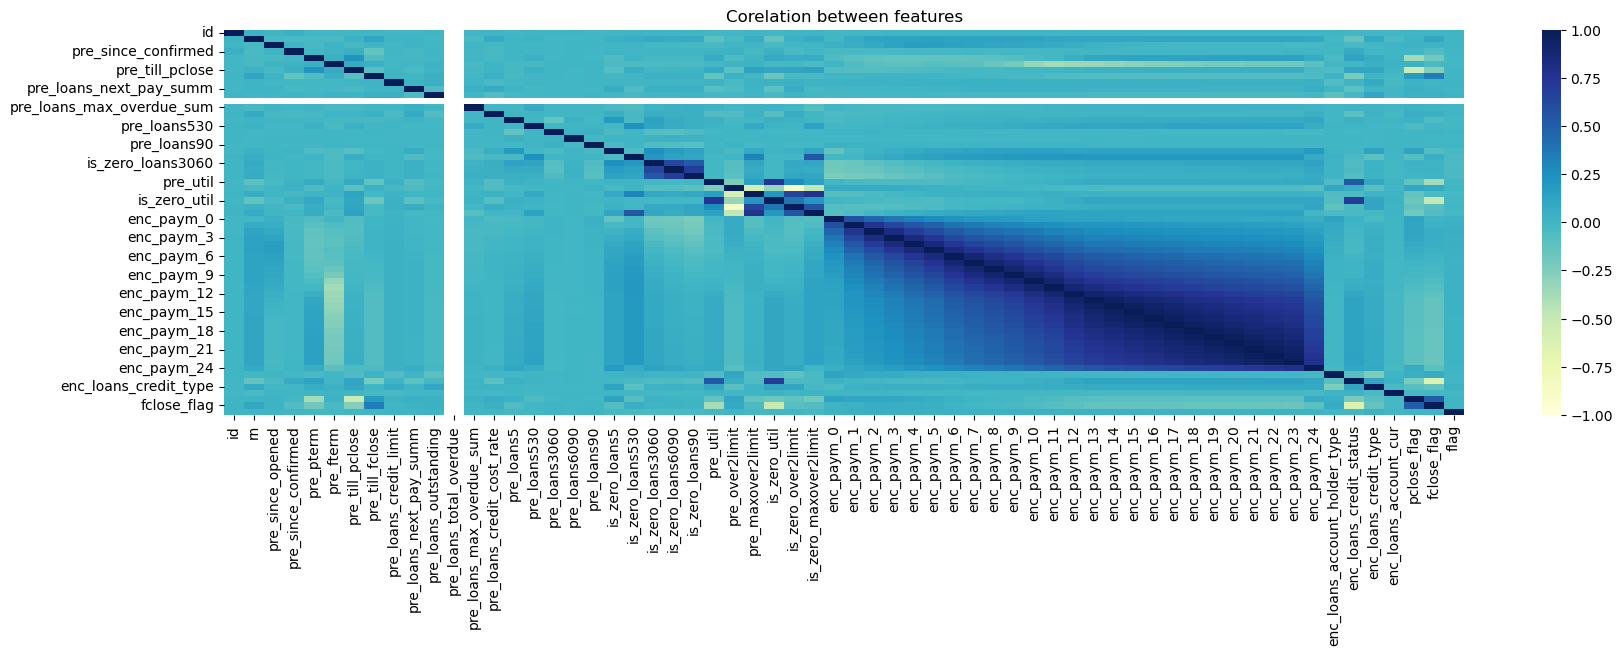

In [57]:
corr = final_data.corr()
plt.figure(figsize=(20,5))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart

sns.heatmap(corr,cmap='YlGnBu', vmax= 1.0, vmin = -1.0)

plt.title('Corelation between features')
plt.show()

****Below code will print highly correlated columns in data set, I have set thresohold to 0.7 , can adjust as per requirment ****


In [58]:
df = pd.DataFrame(corr)
correlation_matrix = df.corr()

correlation_threshold = 0.7 

highly_correlated_columns = []

for column in correlation_matrix:
    correlated_columns = correlation_matrix[column][correlation_matrix[column] > correlation_threshold].index.tolist()
    highly_correlated_columns.extend([(column, correlated_column) for correlated_column in correlated_columns])
# Print the highly correlated column pairs
for pair in highly_correlated_columns:
    print(f"Columns '{pair[0]}' and '{pair[1]}' are highly correlated.")

Columns 'id' and 'id' are highly correlated.
Columns 'rn' and 'rn' are highly correlated.
Columns 'pre_since_opened' and 'pre_since_opened' are highly correlated.
Columns 'pre_since_confirmed' and 'pre_since_confirmed' are highly correlated.
Columns 'pre_pterm' and 'pre_pterm' are highly correlated.
Columns 'pre_fterm' and 'pre_fterm' are highly correlated.
Columns 'pre_till_pclose' and 'pre_till_pclose' are highly correlated.
Columns 'pre_till_fclose' and 'pre_till_fclose' are highly correlated.
Columns 'pre_loans_credit_limit' and 'pre_loans_credit_limit' are highly correlated.
Columns 'pre_loans_next_pay_summ' and 'pre_loans_next_pay_summ' are highly correlated.
Columns 'pre_loans_outstanding' and 'pre_loans_outstanding' are highly correlated.
Columns 'pre_loans_max_overdue_sum' and 'pre_loans_max_overdue_sum' are highly correlated.
Columns 'pre_loans_credit_cost_rate' and 'pre_loans_credit_cost_rate' are highly correlated.
Columns 'pre_loans5' and 'pre_loans5' are highly correlated

In [59]:
final_data.columns

Index(['id', 'rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_total_overdue',
       'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5',
       'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90',
       'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060',
       'is_zero_loans6090', 'is_zero_loans90', 'pre_util', 'pre_over2limit',
       'pre_maxover2limit', 'is_zero_util', 'is_zero_over2limit',
       'is_zero_maxover2limit', 'enc_paym_0', 'enc_paym_1', 'enc_paym_2',
       'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7',
       'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12',
       'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16',
       'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20',
       'enc_paym_21', 

In [60]:
final_data.shape

(1974724, 62)

In [61]:
X = final_data.iloc[:,:61]
y = final_data['flag']

# split data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# checking the dimensions of the train & test subset
# to print dimension of train set
print(X_train.shape)
# to print dimension of test set
print(X_test.shape)

(1382306, 61)
(592418, 61)


In [62]:
X.head(2)

,id,rn,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_loans5,pre_loans530,pre_loans3060,pre_loans6090,pre_loans90,is_zero_loans5,is_zero_loans530,is_zero_loans3060,is_zero_loans6090,is_zero_loans90,pre_util,pre_over2limit,pre_maxover2limit,is_zero_util,is_zero_over2limit,is_zero_maxover2limit,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24,enc_loans_account_holder_type,enc_loans_credit_status,enc_loans_credit_type,enc_loans_account_cur,pclose_flag,fclose_flag
0,0,1,18,9,2,3,16,10,11,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,4,1,3,4,1,0,0
1,0,2,18,9,14,14,12,12,0,3,3,0,2,11,6,16,5,4,8,1,1,1,1,1,16,2,17,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,3,4,1,0,0


In [63]:
# import logistic regression and train on tarining set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [64]:
# Predict price range of test data
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9709765739731068

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    575224
           1       0.00      0.00      0.00     17194

    accuracy                           0.97    592418
   macro avg       0.49      0.50      0.49    592418
weighted avg       0.94      0.97      0.96    592418



[[575224      0]
 [ 17194      0]]


<Axes: >

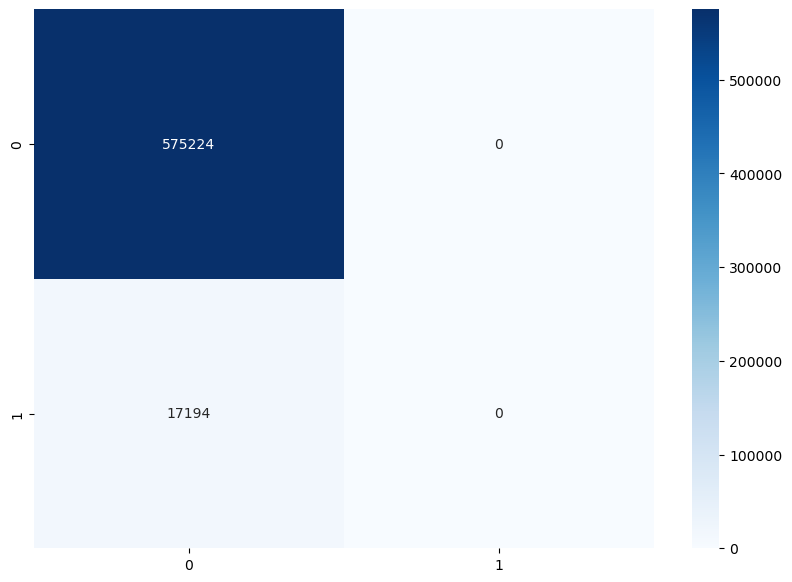

In [67]:
from sklearn.metrics import confusion_matrix
# Display confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

From the confusion matrix , it seems that the model made only positive predictions (575224) and did not predict any negative instances (0). This could indicate a problem with the model's performance, as it did not correctly predict any negative cases and failed to differentiate between the two classes.